In [3]:
import pandas as pd
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def scores_min_max_temp(T_min_modele,T_max_modele,sensibilite,Temp_Abs_Min,Temp_Abs_Max):
    Score_min_max = 1
    if T_min_modele <= Temp_Abs_Min:
        a = ((1 - 0.5)/(Temp_Abs_Min - (Temp_Abs_Min - sensibilite)))
        b = 1 - a*Temp_Abs_Min
        Score_min_max = a*T_min_modele + b
    if T_max_modele >= Temp_Abs_Max:
        a = -(1 - 0.5)/(Temp_Abs_Max - (Temp_Abs_Max - sensibilite))
        b = 1- a*Temp_Abs_Max
        Score_min_max = a*T_max_modele + b
    if Score_min_max < 0:
        Score_min_max = 0
    return Score_min_max


def scores_temp(T_moy_modele,T_min_modele,T_max_modele,temp_opt_min,Temp_Opt_Max,Temp_Abs_Min,Temp_Abs_Max, sensibilite):
    Score_min_max = scores_min_max_temp(T_min_modele,T_max_modele,sensibilite,Temp_Abs_Min,Temp_Abs_Max)
    Score = 1
    if T_moy_modele <= temp_opt_min:
        a = ( 1 - 0 )/(temp_opt_min - Temp_Abs_Min) 
        b = 1 - a*temp_opt_min
        Score = a*T_moy_modele + b
    if T_moy_modele >= Temp_Opt_Max:
        a = (1 - 0 )/(Temp_Opt_Max - Temp_Abs_Max)
        b = 1 - a*Temp_Opt_Max
        Score = a*T_moy_modele + b
    if Score < 0:
        Score = 0
    Score_tot = Score_min_max*Score
    return Score_tot,Score_min_max,Score

def Score_Moyglissante_temp(Score_Mois,temps_pousse):
    Moy_glissante = []
    for i in range(12):
        Score_Mois.append(Score_Mois[i])
        Moy_calcul = Score_Mois[0+i:i+temps_pousse]
        Score = 1
        for donnee in Moy_calcul:
            #print (donnee)
            Score = Score*donnee
        Moy_glissante.append(Score)
    Score_max = np.max(Moy_glissante)
    periode = np.argmax(Moy_glissante)
    return Score_max,periode

def scores_pluv(Rain_modele,Rain_Opt_min,Rain_Opt_Max,Rain_Abs_Min,Rain_Abs_Max):
    """Rain_modele : le cumul de pluviométrie prevue 
    Rain_opt_min : born inferieur de la pluviométrie optimal 
    Rain_Opt_Max : born superieur de la pluviométrie optimal
    Rain_abs_min : pluviometrie minimal accepter par la plante
    Rain_abs_max : pluviometrie maximal accepter par la plante"""
    Score = 1
    if Rain_modele <= Rain_Opt_min:
        a = ( 1 - 0 )/(Rain_Opt_min - Rain_Abs_Min) 
        b = 1 - a*Rain_Opt_min
        Score = a*Rain_modele + b
    if Rain_modele >= Rain_Opt_Max:
        a = (1 - 0 )/(Rain_Opt_Max - Rain_Abs_Max)
        b = 1 - a*Rain_Opt_Max
        Score = a*Rain_modele + b
    if Score < 0:
        Score = 0
    return Score

In [5]:
### LOAD DATA ####
climate_df = pd.read_csv('indices_France_2020-2050-mensuelles.txt',sep=";")
display (climate_df.head(30))
climate_df = climate_df.iloc[:,0:-1]
#print(climate_df.iloc[:,5:].describe())
#print(climate_df.describe())
#print(climate_df.columns)
climate_df.columns = ["Point",'Latitude', 'Longitude', 'Contexte', 'Période', 'Mois','Tmoy','Tmin','Tmax','NORTRAV', 'NORTXQ90', 'NORTXQ10',
       'NORTNQ10', 'NORTNQ90', 'NORHDD', 'NORCDD', 'NORPAV', 'NORRR','NORPFL90', 'NORPINT']
print (climate_df.columns)
### TEST UN POINT UNE ESPECE ###
#Points = climate_df.unique(df['Point'])
#Point = Points[0]
#crop_une_station = climate_df[climate_df['Point']==282]
#print(crop_une_station)
#for indice in range(crop_une_station.shape[0]):
#    ligne = crop_une_station.iloc[indice,:]
#    print(ligne)
#    Score_point_mois_ = []

,Point,Latitude,Longitude,Contexte,Période,Mois,NORTAV,NORTNAV,NORTXAV,NORTRAV,...,NORTXQ10,NORTNQ10,NORTNQ90,NORHDD,NORCDD,NORPAV,NORRR,NORPFL90,NORPINT,Unnamed: 20
0,282,41.4087,9.1577,RCP2.6,H1,1,9.58,6.16,12.99,6.83,...,9.74,1.13,10.51,230.12,0.00,2.93,90.94,75.42,8.96,NaN
1,282,41.4087,9.1577,RCP2.6,H1,2,9.88,6.40,13.36,6.96,...,10.27,1.91,10.61,201.24,0.04,3.12,87.89,71.46,9.08,NaN
2,282,41.4087,9.1577,RCP2.6,H1,3,11.56,7.70,15.43,7.74,...,11.17,2.12,11.97,169.93,0.60,2.54,78.59,65.04,7.85,NaN
3,282,41.4087,9.1577,RCP2.6,H1,4,13.96,10.20,17.72,7.51,...,14.22,6.23,13.20,95.15,1.58,2.45,73.62,69.98,7.78,NaN
4,282,41.4087,9.1577,RCP2.6,H1,5,18.63,14.56,22.69,8.13,...,17.46,10.69,18.05,19.31,51.10,1.57,48.70,57.13,6.62,NaN
5,282,41.4087,9.1577,RCP2.6,H1,6,21.99,17.63,26.34,8.72,...,22.82,14.79,20.11,0.40,121.00,0.82,24.53,40.56,5.68,NaN
6,282,41.4087,9.1577,RCP2.6,H1,7,25.78,21.12,30.45,9.33,...,26.95,18.37,23.36,0.00,241.23,0.42,13.17,28.21,7.11,NaN
7,282,41.4087,9.1577,RCP2.6,H1,8,26.79,22.10,31.48,9.38,...,27.78,19.23,24.29,0.00,272.49,0.52,16.04,40.52,8.09,NaN
8,282,41.4087,9.1577,RCP2.6,H1,9,22.36,17.96,26.77,8.81,...,23.33,14.75,20.62,0.58,132.13,2.60,78.12,78.72,9.72,NaN
9,282,41.4087,9.1577,RCP2.6,H1,10,17.85,13.75,21.94,8.18,...,18.53,9.80,17.18,19.88,28.87,2.72,84.18,78.83,9.18,NaN


Index(['Point', 'Latitude', 'Longitude', 'Contexte', 'Période', 'Mois', 'Tmoy',
       'Tmin', 'Tmax', 'NORTRAV', 'NORTXQ90', 'NORTXQ10', 'NORTNQ10',
       'NORTNQ90', 'NORHDD', 'NORCDD', 'NORPAV', 'NORRR', 'NORPFL90',
       'NORPINT'],
      dtype='object')


In [6]:
pheno_df = pd.read_csv('plantes_sol.csv',sep=",")
to_keep = ['species', 'temp_opt_min','Temp_Opt_Max', 'Temp_Abs_Min', 'Temp_Abs_Max', 'Rain_Opt_Min',
           'Rain_Opt_Max', 'Rain_Abs_Min', 'Rain_Abs_Max', 'pH_Opt_Min', 'pH_Opt_Max','pH_Abs_Min', 'pH_Abs_Max', 
           'temps_pousse']
pheno_df = pheno_df[to_keep]
display(pheno_df)

,species,temp_opt_min,Temp_Opt_Max,Temp_Abs_Min,Temp_Abs_Max,Rain_Opt_Min,Rain_Opt_Max,Rain_Abs_Min,Rain_Abs_Max,pH_Opt_Min,pH_Opt_Max,pH_Abs_Min,pH_Abs_Max,temps_pousse
0,Colza,15,25,5,41,500,1000,400,2800,6.5,7.6,5.5,8.0,12
1,Soja,20,33,10,38,600,1500,450,1800,5.5,6.5,4.5,8.4,5
2,Orge,15,20,2,40,500,1000,200,2000,6.5,7.5,6.0,8.0,8
3,Manioc,20,29,10,35,1000,1500,500,5000,5.5,8.0,4.0,9.0,7
4,Basilic,18,27,7,36,1000,1600,600,4300,6.0,7.0,4.3,8.2,6
5,Pomme de terre,15,25,7,30,500,800,250,2000,5.0,6.2,4.2,8.5,6
6,Cacao,21,32,10,38,1200,3000,900,7600,5.0,6.5,4.0,8.0,12
7,Mais,18,33,10,47,600,1200,400,1800,5.0,7.0,4.5,8.5,7
8,Lavande,17,26,10,30,600,1000,400,1200,6.5,7.0,5.8,7.5,6
9,Riz,25,35,16,38,1500,2000,1000,4000,5.0,8.0,3.5,9.0,6


In [7]:
def get_climate_metrics(climate_df, horizon, scenario):
    climate_metrics = climate_df[(climate_df['Période'] == horizon) & (climate_df['Contexte'] == scenario)]
    return climate_metrics

In [32]:
new = get_climate_metrics(climate_df, 'H1', 'RCP2.6')
print (type(new))
#print (new.info())
#print (new.head(30))
unique_points = new['Point'].unique()
#listofdfs = [new.loc[new['Point']==val, :] for val in new['Point'].unique()]
#print (listofdfs)
#list_df = 
list_df = new.grouby(ne)

<class 'pandas.core.frame.DataFrame'>


In [8]:
SENSIBILITE = 1

In [22]:
## 7000 points -> 7000 lignes 
## long, lat, score_totale, score_pluie, score_temp
def get_all_scores(climate_df, pheno_df, species, horizon, scenario):
    total_temp_score = []
    total_pluv_score = []
    total_lat = []
    total_long = []
    mix_total_score = []
    name_lst = []
    climate_metrics = get_climate_metrics(climate_df, horizon, scenario)
    species_metrics = pheno_df[pheno_df['species'] == species]
    species_metrics.reset_index(drop=True, inplace=True)
    temp_opt_min = species_metrics['temp_opt_min'][0]
    Temp_Opt_Max = species_metrics['Temp_Opt_Max'][0]
    Temp_Abs_Min = species_metrics['Temp_Abs_Min'][0]
    Temp_Abs_Max = species_metrics['Temp_Abs_Max'][0]
    Rain_Opt_min = species_metrics['Rain_Opt_Min'][0]
    Rain_Opt_Max = species_metrics['Rain_Opt_Max'][0]
    Rain_Abs_Min = species_metrics['Rain_Abs_Min'][0]
    Rain_Abs_Max = species_metrics['Rain_Abs_Max'][0]
    temps_pousse = species_metrics['temps_pousse'][0]
    unique = climate_metrics.groupby('Point')
    for name, group in unique:
        month_score = []
        #print (f'--NEW : {name}--')
        long = group['Longitude'].values[0]
        lat = group['Latitude'].values[0]
        for idx, row in group.iterrows():
            T_moy = row['Tmoy']
            T_min = row['Tmin']
            T_max = row['Tmax']
            score = scores_temp(T_moy, T_min, T_max, temp_opt_min, Temp_Opt_Max, Temp_Abs_Min, Temp_Abs_Max, SENSIBILITE)
            month_score.append(score[0])
        total_score = Score_Moyglissante_temp(month_score, temps_pousse)
        period = total_score[1]
        cumul = group['NORRR']
        Rain_model = cumul[period:period+temps_pousse].sum()
        score_pluv = scores_pluv(Rain_model,Rain_Opt_min,Rain_Opt_Max,Rain_Abs_Min,Rain_Abs_Max)
        #print (total_score[0])
        #print (score_pluv)
        mixed_score = total_score[0] * score_pluv
        total_temp_score.append(total_score[0])
        total_pluv_score.append(score_pluv)
        total_lat.append(lat)
        total_long.append(long)
        mix_total_score.append(mixed_score)
        name_lst.append(name)
    result_dict = {'Point': name_lst, 'Lat':total_lat, 'Long':total_long,
                   'Temp_score':total_temp_score, 'Pluv_score':total_pluv_score,
                  'Total_score':mix_total_score}
    result_df = pd.DataFrame(result_dict)
    display(result_df.sample(25))
    return result_df

In [23]:
new = get_all_scores(climate_df, pheno_df, 'Orge', 'H3', 'RCP2.6')

,Point,Lat,Long,Temp_score,Pluv_score,Total_score
5745,12524,47.8047,3.9920,0.214362,1.000000,0.214362
5752,12531,47.7917,4.7392,0.172164,1.000000,0.172164
7761,15268,49.0924,6.9912,0.155332,1.000000,0.155332
53,1564,42.0825,8.7528,0.430011,0.937067,0.402949
1697,5476,44.2603,-0.2164,0.371842,1.000000,0.371842
3735,9088,46.0829,3.5261,0.200175,1.000000,0.200175
7368,14660,48.8932,3.0453,0.222518,0.832133,0.185164
8205,16247,49.6646,4.6059,0.135723,1.000000,0.135723
8506,17798,50.4757,2.1678,0.156308,1.000000,0.156308
540,3488,43.2774,1.2051,0.365469,0.926000,0.338424


In [24]:
display(new.sample(20))

,Point,Lat,Long,Temp_score,Pluv_score,Total_score
6390,13370,48.2474,2.7135,0.225872,0.900767,0.203458
5097,11530,47.2882,4.7166,0.143472,1.000000,0.143472
7058,14219,48.6781,1.7393,0.212114,0.758700,0.160931
2710,7232,45.1438,3.8111,0.040147,1.000000,0.040147
6891,14020,48.4203,-4.3166,0.309442,1.000000,0.309442
267,2644,42.8519,2.5807,0.347862,1.000000,0.347862
4365,10242,46.6429,4.5837,0.207852,1.000000,0.207852
2904,7621,45.3391,-0.2661,0.380166,1.000000,0.380166
5843,12663,47.8819,3.5665,0.264522,0.987633,0.261251
4695,10826,46.8989,5.8552,0.093676,0.964140,0.090317


<AxesSubplot:>

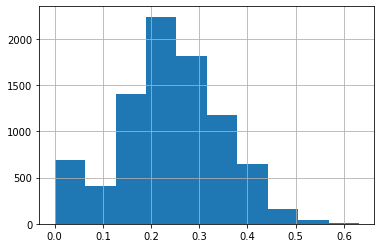

In [25]:
new['Temp_score'].hist()

In [18]:
new.to_csv('total_score_H3_2_6.csv')